# 1) Problem Statement :  Bike Sharing Demand Analysis - Regression

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


# Attribute Information:

#  instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
   
   weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered#

# 2) Importing Libraries

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,adjusted_rand_score


In [4]:
warnings.filterwarnings(action='ignore')

# 3) Data Gathering

In [5]:
df=pd.read_csv('hour.csv')

In [6]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
list1=[]
for i in df['dteday']:
    list1.append((re.findall('..$',i)))

In [8]:
date=[num for sublist in list1 for num in sublist]


In [9]:
df['date']=date

In [10]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,01
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,01
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,01
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,01


In [11]:
df.drop('dteday',axis=1,inplace=True)

# 4) EDA

In [12]:
df_train=df.drop(['cnt'],axis=1)
columns=df_train.columns


In [13]:
def scatterplot(column):
    for i in column:
        
        yield (print(sns.scatterplot(data=df, x=i, y="cnt")))

AxesSubplot(0.125,0.125;0.775x0.755)
None


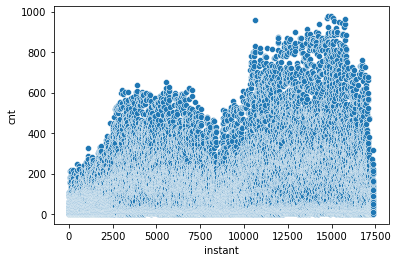

In [14]:
var1=scatterplot(columns)
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


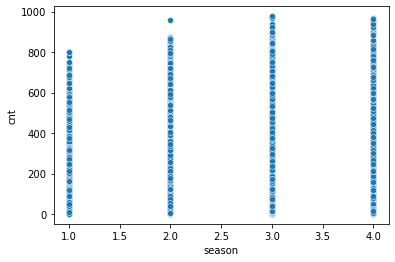

In [15]:
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


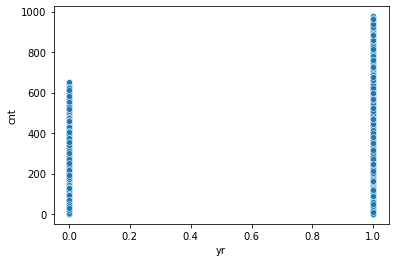

In [16]:
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


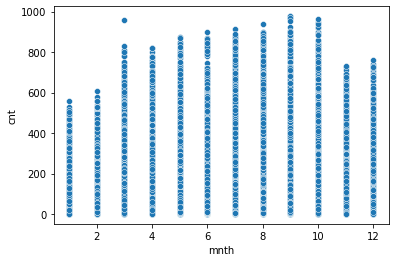

In [17]:
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


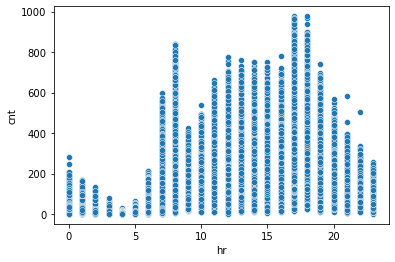

In [18]:
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


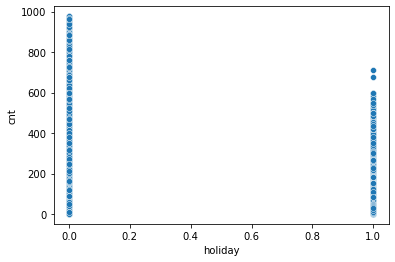

In [19]:
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


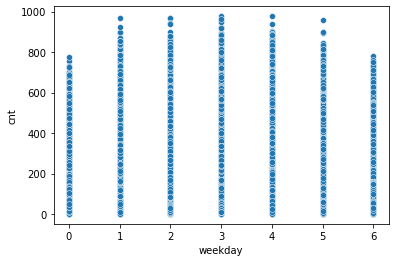

In [20]:
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


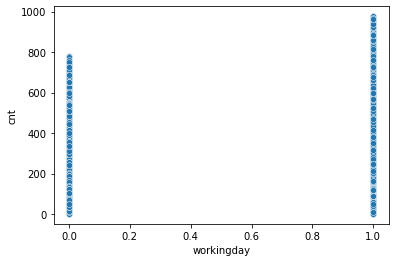

In [21]:
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


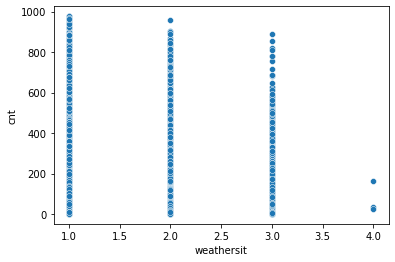

In [22]:
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


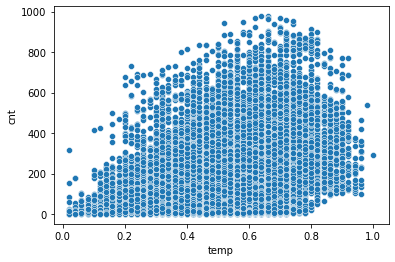

In [23]:
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


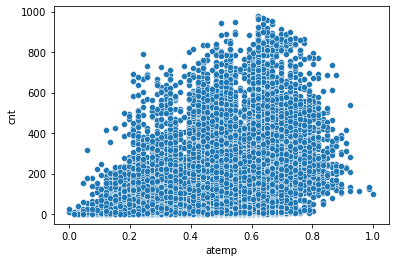

In [24]:
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


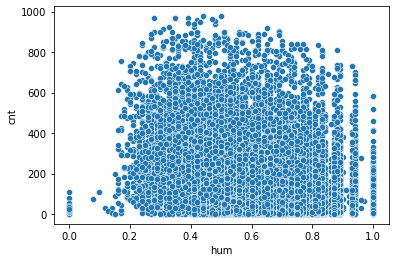

In [25]:
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


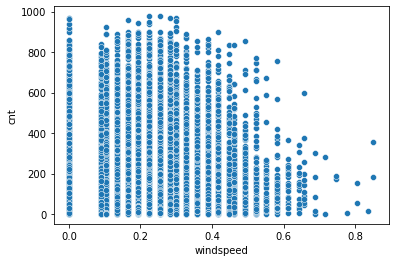

In [26]:
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


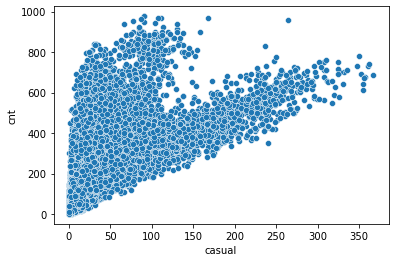

In [27]:
print(next(var1))

AxesSubplot(0.125,0.125;0.775x0.755)
None


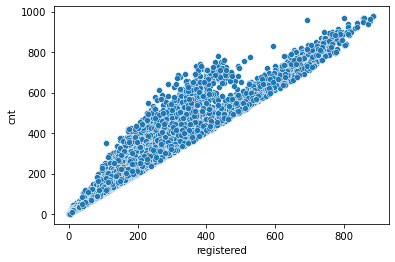

In [28]:
print(next(var1))

### Hear we see there is Linerity between only registered feature and our target column

<AxesSubplot:>

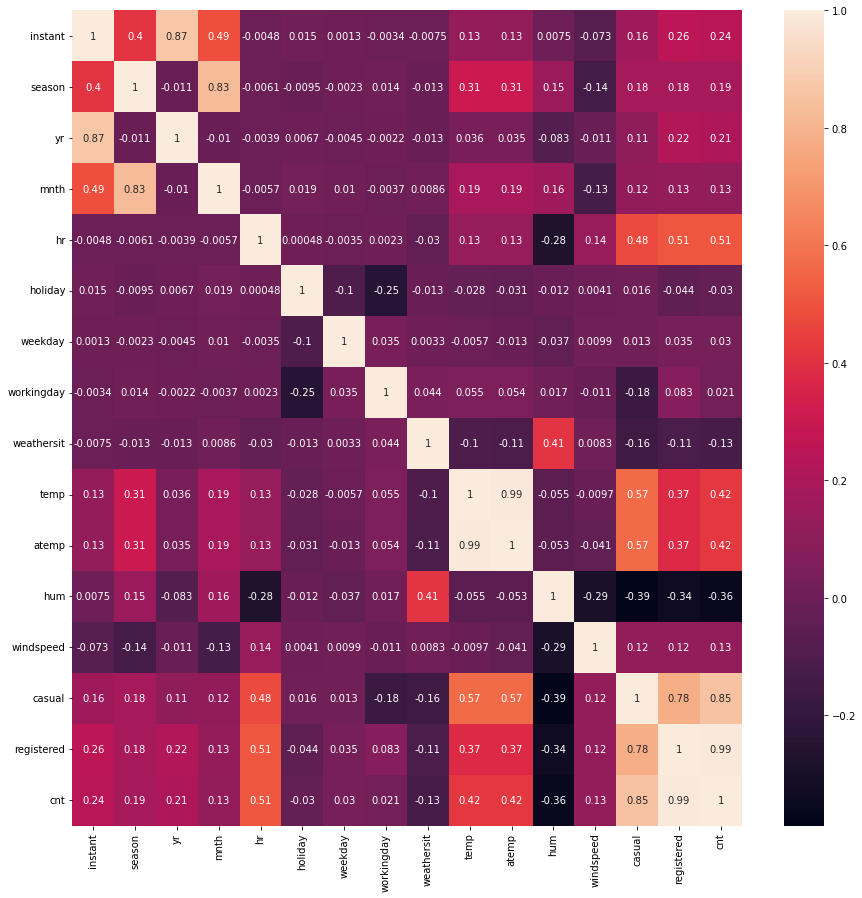

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method = 'spearman'),annot=True)


## registered and casual feature are Strongly corelated with the target feature

#  4.1 Hypothesis Testing

### As data is numerical there is no need of hypothesis testing

# 5. Feature Engineering

#### 5.1)    Imputation 

In [30]:
df.isna().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
date          0
dtype: int64

### There are no nan values in the data set

## 5.2) Handling the outliers

AxesSubplot(0.125,0.125;0.775x0.755)


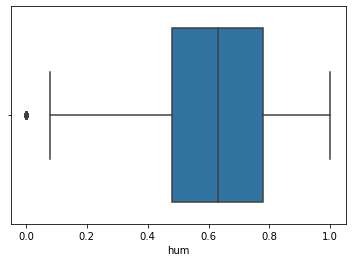

In [31]:

print(sns.boxplot((df['hum'])))


AxesSubplot(0.125,0.125;0.775x0.755)


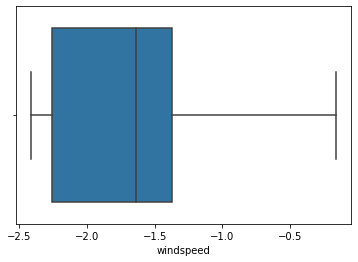

In [32]:

print(sns.boxplot(np.log(df['windspeed'])))

df['windspeed']=np.log(df['windspeed'])



AxesSubplot(0.125,0.125;0.775x0.755)


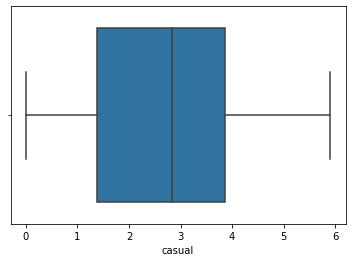

In [33]:
print(sns.boxplot(np.log(df['casual'])))
df['casual']=np.log(df['casual'])


AxesSubplot(0.125,0.125;0.775x0.755)


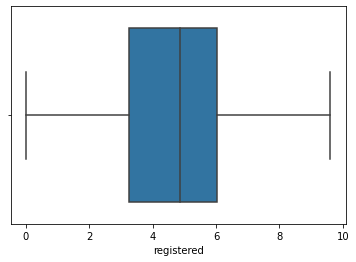

In [34]:
print(sns.boxplot(np.cbrt(df['registered'])))
df['registered']=np.cbrt(df['registered'])

In [35]:
df = df.astype({"temp":'int64', "atemp":'int64','hum':'int64','registered':'int64'})

In [36]:
df.drop(["windspeed","casual"],axis=1,inplace=True)

# 5.3 Normalization And Standardization

In [37]:
scl=MinMaxScaler()

In [38]:
x=df.drop('cnt',axis=1)
y=df['cnt']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=44,test_size=0.2)

In [40]:
X_train=scl.fit(x_train)
X_test=scl.transform(x_test)

# 6 Feature Selection

### 6.1 Variance Threshold Method

In [41]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=0.8)
var_thresh.fit(df)
var_thresh.get_support()
# It will return the Boolean value – True value feature will selected 
# Threshold we generally keep it as 0.7 or 0.8


array([ True,  True, False,  True,  True, False,  True, False, False,
       False, False, False,  True,  True,  True])

In [42]:
df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,registered,cnt,date
0,1,1,0,1,0,0,6,0,1,0,0,0,2,16,01
1,2,1,0,1,1,0,6,0,1,0,0,0,3,40,01
2,3,1,0,1,2,0,6,0,1,0,0,0,3,32,01
3,4,1,0,1,3,0,6,0,1,0,0,0,2,13,01
4,5,1,0,1,4,0,6,0,1,0,0,0,1,1,01


### 6.2 Exhaustive Feature Selector

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
log_reg = LogisticRegression() # (Consider any appropriate model)
sfs = SequentialFeatureSelector(log_reg, direction='backward', n_features_to_select = 5)
# (pass the model instance and direction as backward & number of features to select)
sfs.fit(x,y)  #(fit the X and Y with instance)
sel = sfs.get_support() # (It will give the Boolean result True or False)
sfs.get_feature_names_out() # (It will give the names of selected feature)


KeyboardInterrupt: 

In [44]:
rm_model=RandomForestRegressor()
rm_model.fit(x_train,y_train)


RandomForestRegressor()

# Testing data Evaluation

In [51]:
y_pred_test=rm_model.predict(x_test)
print(f"mean_absolute_error={mean_absolute_error(y_test,y_pred_test)}")
print(f"mean_squared_error={mean_squared_error(y_test,y_pred_test)}")
print(f"r2_score={r2_score(y_test,y_pred_test)}")
print(f"adjusted_rand_score={adjusted_rand_score(y_test,y_pred_test)}")

mean_absolute_error=18.604913693901032
mean_squared_error=801.3349094361336
r2_score=0.9757298977347273
adjusted_rand_score=0.0017649421536559229


# Training data Evaluation

In [52]:
y_pred_train=rm_model.predict(x_train)
print(f"mean_absolute_error={mean_absolute_error(y_train,y_pred_train)}")
print(f"mean_squared_error={mean_squared_error(y_train,y_pred_train)}")
print(f"r2_score={r2_score(y_train,y_pred_train)}")
print(f"adjusted_rand_score={adjusted_rand_score(y_train,y_pred_train)}")

mean_absolute_error=6.641908940516434
mean_squared_error=101.14117423577645
r2_score=0.9969226353752599
adjusted_rand_score=0.004668999510551865


# Feature Importance by Random Forest Regressor

<BarContainer object of 14 artists>

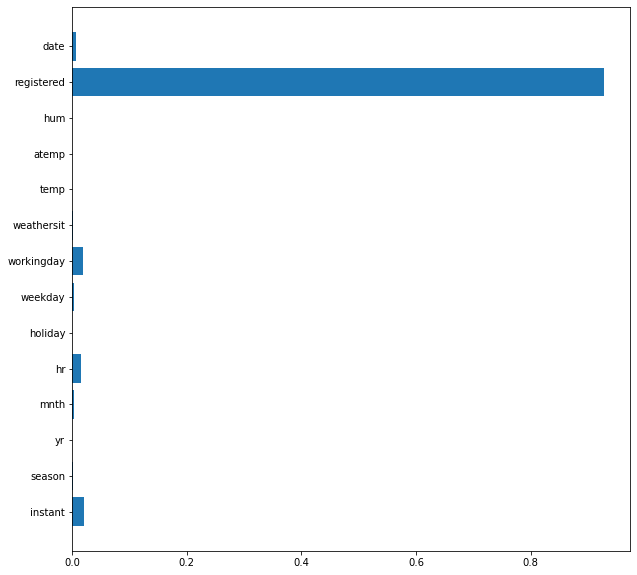

In [50]:
rm_model.feature_importances_
plt.figure(figsize=(10,10))
plt.barh(x_train.columns, rm_model.feature_importances_)